## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Read files
df_flights = pd.read_csv("data/flights.csv")

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [4]:
## Change the date format
def convert_time_to_string(x):
    if pd.isnull(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'
    
    string = str(int(x))
    
    if len(string) < 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [5]:

df_flights['arr_time'] = df_flights['arr_time'].apply(lambda x: convert_time_to_string(x))
df_flights['arr_time'] = pd.to_datetime(df_flights['arr_time'], format = '%H:%M', errors = 'coerce').dt.time

df_flights['dep_time'] = df_flights['dep_time'].apply(lambda x: convert_time_to_string(x))
df_flights['dep_time'] = pd.to_datetime(df_flights['dep_time'], format = '%H:%M', errors = 'coerce').dt.time

df_flights['wheels_off'] = df_flights['wheels_off'].apply(lambda x: convert_time_to_string(x))
df_flights['wheels_off'] = pd.to_datetime(df_flights['wheels_off'], format = '%H:%M', errors = 'coerce').dt.time

df_flights['wheels_on'] = df_flights['wheels_on'].apply(lambda x: convert_time_to_string(x))
df_flights['wheels_on'] = pd.to_datetime(df_flights['wheels_on'], format = '%H:%M', errors = 'coerce').dt.time
df_flights['crs_dep_time'] = df_flights['crs_dep_time'].apply(lambda x: convert_time_to_string(x))
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H:%M', errors = 'coerce').dt.time

df_flights['crs_arr_time'] = df_flights['crs_arr_time'].apply(lambda x: convert_time_to_string(x))
df_flights['crs_arr_time'] = pd.to_datetime(df_flights['crs_arr_time'], format = '%H:%M', errors = 'coerce').dt.time

In [6]:
taxi_df = df_flights.filter(['taxi_in', 'taxi_out', 'dep_time','arr_time'], axis=1)
taxi_df

,taxi_in,taxi_out,dep_time,arr_time
0,4.0,20.0,14:53:00,16:35:00
1,10.0,38.0,17:57:00,22:01:00
2,4.0,16.0,16:30:00,18:41:00
3,2.0,12.0,21:14:00,23:41:00
4,4.0,16.0,20:15:00,23:16:00
...,...,...,...,...
195867,8.0,27.0,16:18:00,18:26:00
195868,18.0,12.0,19:18:00,20:45:00
195869,2.0,22.0,14:40:00,15:30:00
195870,7.0,24.0,08:00:00,10:27:00


In [7]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195872 entries, 0 to 195871
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   taxi_in   195872 non-null  float64
 1   taxi_out  195872 non-null  float64
 2   dep_time  195872 non-null  object 
 3   arr_time  195872 non-null  object 
dtypes: float64(2), object(2)
memory usage: 6.0+ MB


In [8]:
taxi_df['dep_time'] = pd.to_datetime(taxi_df['dep_time'], format ='%H:%M:%S')
taxi_df['arr_time'] = pd.to_datetime(taxi_df['arr_time'], format ='%H:%M:%S')

In [9]:
taxi_df['dep_hour'] = taxi_df['dep_time'].dt.hour
taxi_df['arr_hour'] = taxi_df['arr_time'].dt.hour
taxi_df

,taxi_in,taxi_out,dep_time,arr_time,dep_hour,arr_hour
0,4.0,20.0,1900-01-01 14:53:00,1900-01-01 16:35:00,14,16
1,10.0,38.0,1900-01-01 17:57:00,1900-01-01 22:01:00,17,22
2,4.0,16.0,1900-01-01 16:30:00,1900-01-01 18:41:00,16,18
3,2.0,12.0,1900-01-01 21:14:00,1900-01-01 23:41:00,21,23
4,4.0,16.0,1900-01-01 20:15:00,1900-01-01 23:16:00,20,23
...,...,...,...,...,...,...
195867,8.0,27.0,1900-01-01 16:18:00,1900-01-01 18:26:00,16,18
195868,18.0,12.0,1900-01-01 19:18:00,1900-01-01 20:45:00,19,20
195869,2.0,22.0,1900-01-01 14:40:00,1900-01-01 15:30:00,14,15
195870,7.0,24.0,1900-01-01 08:00:00,1900-01-01 10:27:00,8,10


In [10]:
mean_taxi_out = taxi_df.groupby('dep_hour')['taxi_out'].mean()
mean_taxi_in = taxi_df.groupby('dep_hour')['taxi_in'].mean()

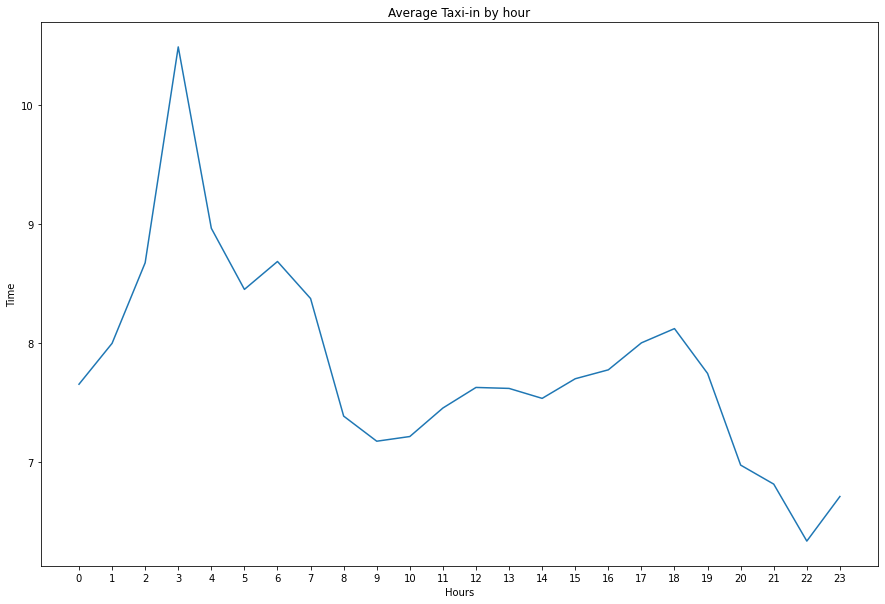

In [15]:
fig, axes = plt.subplots(figsize=(15,10))
sns.lineplot(ax=axes, x=mean_taxi_in.index, y=mean_taxi_in.values)
plt.xticks(mean_taxi_in.index);
axes.set_title('Average Taxi-in by hour')
axes.set_xlabel('Hours')
axes.set_ylabel('Time')
plt.show()

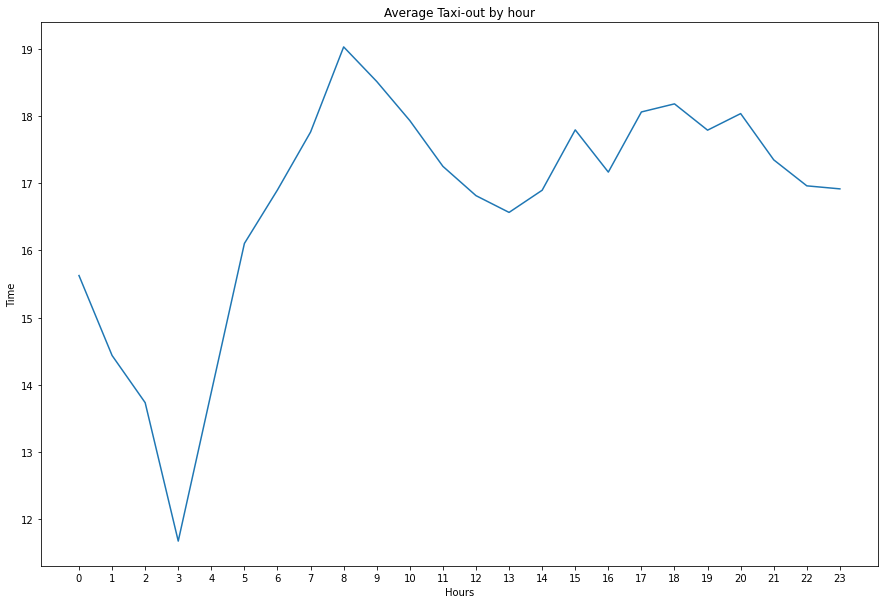

In [16]:
fig, axes = plt.subplots(figsize=(15,10))
sns.lineplot(ax=axes, x=mean_taxi_out.index, y=mean_taxi_out.values)
plt.xticks(mean_taxi_out.index);
axes.set_title('Average Taxi-out by hour')
axes.set_xlabel('Hours')
axes.set_ylabel('Time')
plt.show()